In [169]:
#Importo todas las librerias que vaya a utilizar
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px


In [170]:
response = requests.get("https://api.covid19api.com/summary")

In [171]:
response

<Response [200]>

In [172]:
datos = json.loads(response.text)

In [173]:
datos.keys()

dict_keys(['ID', 'Message', 'Global', 'Countries', 'Date'])

In [174]:
datos['ID']

'eb7dadad-b87f-479e-8140-b25cde2fd40e'

In [175]:
datos['Date']

'2023-04-07T21:34:09.948Z'

In [176]:
datos['Countries']

[{'ID': '5692d427-3758-48c8-a0d6-b013ee0e7f18',
  'Country': 'Afghanistan',
  'CountryCode': 'AF',
  'Slug': 'afghanistan',
  'NewConfirmed': 0,
  'TotalConfirmed': 209451,
  'NewDeaths': 0,
  'TotalDeaths': 7896,
  'NewRecovered': 0,
  'TotalRecovered': 0,
  'Date': '2023-04-07T21:34:09.948Z',
  'Premium': {}},
 {'ID': '9d57a33a-3bd0-444a-8d69-20b588c735d7',
  'Country': 'Albania',
  'CountryCode': 'AL',
  'Slug': 'albania',
  'NewConfirmed': 14,
  'TotalConfirmed': 334457,
  'NewDeaths': 0,
  'TotalDeaths': 3598,
  'NewRecovered': 0,
  'TotalRecovered': 0,
  'Date': '2023-04-07T21:34:09.948Z',
  'Premium': {}},
 {'ID': '451f2eb3-ee11-41bf-ada2-ea6d42546a10',
  'Country': 'Algeria',
  'CountryCode': 'DZ',
  'Slug': 'algeria',
  'NewConfirmed': 2,
  'TotalConfirmed': 271496,
  'NewDeaths': 0,
  'TotalDeaths': 6881,
  'NewRecovered': 0,
  'TotalRecovered': 0,
  'Date': '2023-04-07T21:34:09.948Z',
  'Premium': {}},
 {'ID': '5e4757b6-da2c-4622-8479-ca647663a1dd',
  'Country': 'Andorra',
 

In [177]:
df = pd.DataFrame(datos['Countries'])

In [178]:
df.head()

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,5692d427-3758-48c8-a0d6-b013ee0e7f18,Afghanistan,AF,afghanistan,0,209451,0,7896,0,0,2023-04-07T21:34:09.948Z,{}
1,9d57a33a-3bd0-444a-8d69-20b588c735d7,Albania,AL,albania,14,334457,0,3598,0,0,2023-04-07T21:34:09.948Z,{}
2,451f2eb3-ee11-41bf-ada2-ea6d42546a10,Algeria,DZ,algeria,2,271496,0,6881,0,0,2023-04-07T21:34:09.948Z,{}
3,5e4757b6-da2c-4622-8479-ca647663a1dd,Andorra,AD,andorra,0,47890,0,165,0,0,2023-04-07T21:34:09.948Z,{}
4,563b6f84-da00-45bd-a6ac-36f6f6531f02,Angola,AO,angola,0,105288,0,1933,0,0,2023-04-07T21:34:09.948Z,{}


In [179]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NewConfirmed,197.0,9.001269e+02,4.372967e+03,0.0,0.0,0.0,5.0,46931.0
TotalConfirmed,197.0,3.422847e+06,1.021245e+07,1.0,42906.0,334457.0,1746997.0,103802702.0
NewDeaths,197.0,6.695431e+00,4.464747e+01,0.0,0.0,0.0,0.0,590.0
TotalDeaths,197.0,3.448337e+04,1.117437e+05,0.0,409.0,3514.0,19071.0,1123836.0
NewRecovered,197.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
TotalRecovered,197.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              197 non-null    object
 1   Country         197 non-null    object
 2   CountryCode     197 non-null    object
 3   Slug            197 non-null    object
 4   NewConfirmed    197 non-null    int64 
 5   TotalConfirmed  197 non-null    int64 
 6   NewDeaths       197 non-null    int64 
 7   TotalDeaths     197 non-null    int64 
 8   NewRecovered    197 non-null    int64 
 9   TotalRecovered  197 non-null    int64 
 10  Date            197 non-null    object
 11  Premium         197 non-null    object
dtypes: int64(6), object(6)
memory usage: 18.6+ KB


In [181]:
df['Date']=pd.to_datetime(df['Date'])
df = df.sort_values(by=['Date'])

In [182]:
df.head()

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,5692d427-3758-48c8-a0d6-b013ee0e7f18,Afghanistan,AF,afghanistan,0,209451,0,7896,0,0,2023-04-07 21:34:09.948000+00:00,{}
125,23bef6a7-1055-4bca-837e-c72a95c6168f,Netherlands,NL,netherlands,0,8599981,0,22990,0,0,2023-04-07 21:34:09.948000+00:00,{}
126,dcbd8c8a-375c-4387-8091-75d386f8adae,New Zealand,NZ,new-zealand,1,2236114,0,2550,0,0,2023-04-07 21:34:09.948000+00:00,{}
127,9e5c7a61-7d51-43ad-b4e1-a33dd151f7c7,Nicaragua,NI,nicaragua,0,15655,0,245,0,0,2023-04-07 21:34:09.948000+00:00,{}
128,e4dd95b7-8732-486e-9bc4-d844e821f1fe,Niger,NE,niger,0,9508,0,315,0,0,2023-04-07 21:34:09.948000+00:00,{}


In [183]:
df.NewRecovered.unique()

array([0], dtype=int64)

In [184]:
df.TotalRecovered.unique()

array([0], dtype=int64)

Las dos variables NewRecovered y TotalRecovered pueden ser considerados como dos casos de datos malos ya que todos sus valores equivalen a 0. Como no proporcionan ninguna información útil, los removemos del dataset. 

In [185]:
df_clean= df.copy().drop(['NewRecovered','TotalRecovered'], axis=1)

In [186]:
df_clean.shape

(197, 10)

Otros dos caso de bad data son i) TotalDeaths > TotalConfirmed ii) NewDeaths > NewConfirmed

In [187]:
BadData_i = df_clean[(df_clean['TotalDeaths'] > df_clean['TotalConfirmed'])].index
df_clean.drop(BadData_i , inplace=True)


In [188]:
BadData_ii = df_clean[(df_clean['NewDeaths'] > df_clean['NewConfirmed'])].index
df_clean.drop(BadData_ii , inplace=True)

Creo dos nuevas variables que calcule i) ratio de mortalidad contra casos totales confirmados ii) ratio de mortalidad de fallecimientos nuevos contra casos confirmados nuevos

In [189]:
ratio_mortalidad_casostotales= df_clean['TotalDeaths']/df_clean['TotalConfirmed']

In [190]:
df_clean['ratio_mortalidad_casostotales'] =ratio_mortalidad_casostotales

In [191]:
ratio_nuevo_mortalidad_casostotales= df_clean['NewDeaths']/df_clean['NewConfirmed']

In [192]:
df_clean['ratio_nuevo_mortalidad_casostotales'] =ratio_nuevo_mortalidad_casostotales

C:\Users\moniq\AppData\Local\Temp/ipykernel_24008/1556408182.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

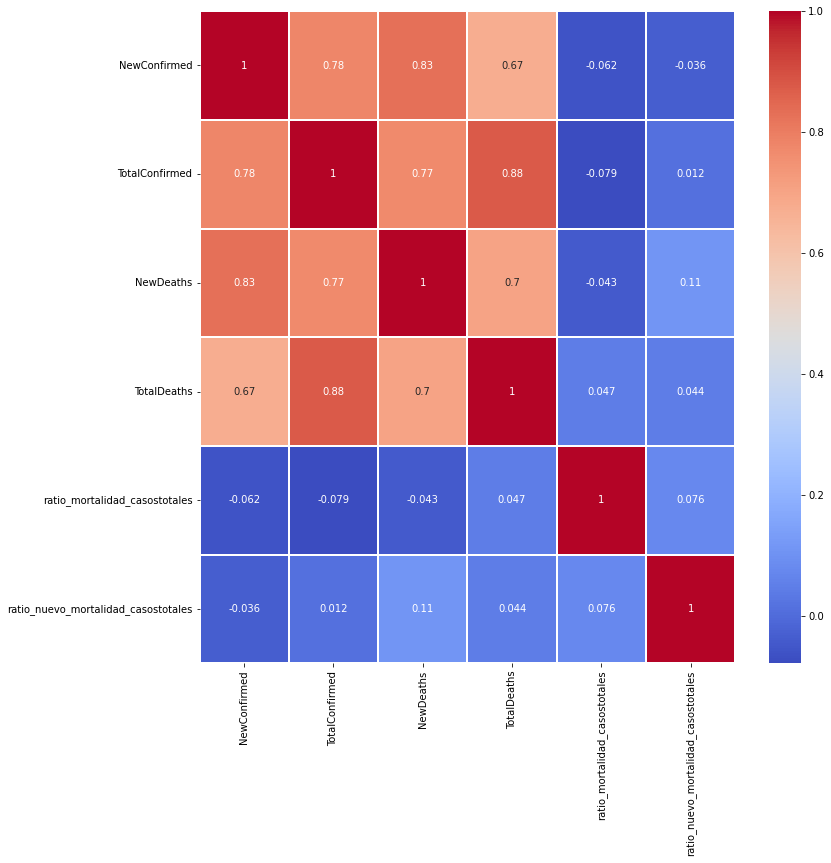

In [193]:
data_corr= df_clean.corr()       
plt.figure(figsize=(12,12))
sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

In [194]:
full_latest = df_clean[df_clean['Date'] == max(df_clean['Date'])]
                         
fig = px.treemap(full_latest.sort_values(by='TotalConfirmed', ascending=False).reset_index(drop=True), 
                 path=["Country"], values="TotalConfirmed", height=1700, title='Total de casos confirmados')
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [195]:
fig = px.scatter(df_clean.sort_values('TotalDeaths', ascending=False).iloc[:20, :], 
                 x='TotalConfirmed', y='TotalDeaths', color='Country', size='TotalConfirmed', height=700,
                 text='Country', log_x=True, log_y=True, title='Relación entre casos totales confirmados y muertes totales confirmadas (escala en log10)')
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

<AxesSubplot:xlabel='ratio_mortalidad_casostotales', ylabel='Count'>

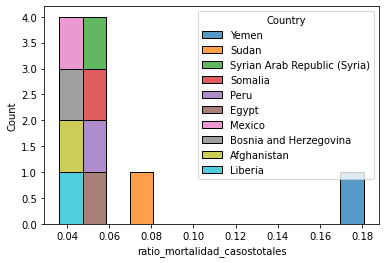

In [196]:
ratio_mortalidad_casostotales_top10 = df_clean.groupby('Country').max().sort_values('ratio_mortalidad_casostotales', ascending=False)[:10]

sns.histplot(data=ratio_mortalidad_casostotales_top10 , x="ratio_mortalidad_casostotales", hue="Country", multiple="stack")

<AxesSubplot:xlabel='ratio_nuevo_mortalidad_casostotales', ylabel='Count'>

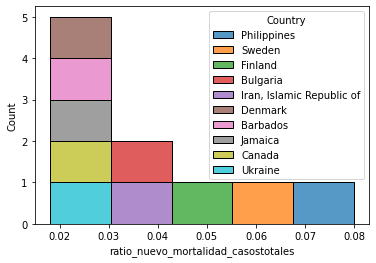

In [204]:
nuevo_ratio_mortalidad_casostotales_top10 = df_clean.groupby('Country').max().sort_values('ratio_nuevo_mortalidad_casostotales', ascending=False)[:10]

sns.histplot(data=nuevo_ratio_mortalidad_casostotales_top10 , x="ratio_nuevo_mortalidad_casostotales", hue="Country", multiple="stack")

In [197]:
def horizontal_bar_chart(df, x, y, title, x_label, y_label, color):
    fig = px.bar(df, x=x, y=y, orientation='h', title=title, 
                 labels={x.name: x_label,
                         y.name: y_label}, color_discrete_sequence=[color])
    fig.update_layout(yaxis={'categoryorder': 'total ascending'})
    fig.show()
    
TotalConfirmed_top10 = df_clean.groupby('Country').max().sort_values('TotalConfirmed', ascending=False)[:10]
horizontal_bar_chart(TotalConfirmed_top10,TotalConfirmed_top10.TotalConfirmed, TotalConfirmed_top10.index,
                     'Top 10 paises con casos confirmados', 'Casos confirmados','País','green')

In [198]:
TotalDeaths_top10 = df_clean.groupby('Country').max().sort_values('TotalDeaths', ascending=False)[:10]
horizontal_bar_chart(TotalDeaths_top10,TotalDeaths_top10.TotalDeaths, TotalDeaths_top10.index,
                     'Top 10 paises con casos de muertes confirmados', 'Muertes confirmadas','País','black')

In [199]:
NewDeaths_top10 = df_clean.groupby('Country').max().sort_values('NewDeaths', ascending=False)[:10]
horizontal_bar_chart(NewDeaths_top10,NewDeaths_top10.NewDeaths, NewDeaths_top10.index,
                     'Top 10 paises con nuevos casos de fallecimientos', 'Nuevos fallecimientos','País','red')

In [200]:
NewConfirmed_top10 = df_clean.groupby('Country').max().sort_values('NewConfirmed', ascending=False)[:10]
horizontal_bar_chart(NewConfirmed_top10,NewConfirmed_top10.NewConfirmed, NewConfirmed_top10.index,
                     'Top 10 paises con nuevos casos confirmados', 'Nuevos casos confirmados','País','Blue')

C:\Users\moniq\AppData\Local\Temp/ipykernel_24008/1987015396.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



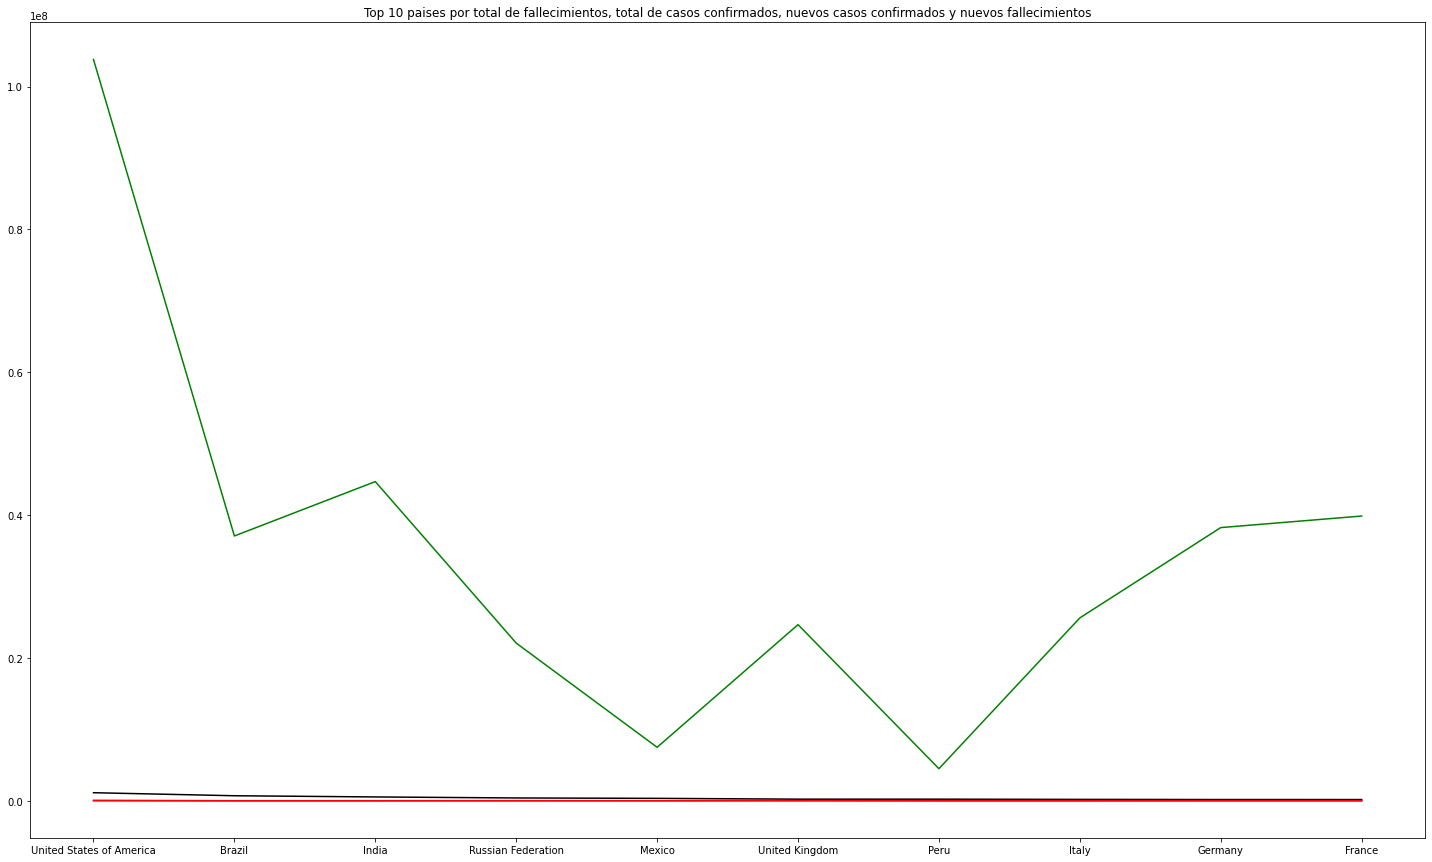

In [201]:
grafico_conjunto = df_clean.groupby(["Country"])["TotalDeaths", "TotalConfirmed", "NewConfirmed", "NewDeaths"].sum().reset_index()
grafico_conjunto = grafico_conjunto.sort_values(by='TotalDeaths', ascending=False)[:10]
plt.figure(figsize=(25, 15))
plt.plot(grafico_conjunto['Country'], grafico_conjunto['TotalDeaths'],color='black')
plt.plot(grafico_conjunto['Country'], grafico_conjunto['TotalConfirmed'],color='green')
plt.plot(grafico_conjunto['Country'], grafico_conjunto['NewConfirmed'], color='blue')
plt.plot(grafico_conjunto['Country'], grafico_conjunto['NewDeaths'], color='red')

plt.title('Top 10 paises por total de fallecimientos, total de casos confirmados, nuevos casos confirmados y nuevos fallecimientos')
plt.show()

C:\Users\moniq\AppData\Local\Temp/ipykernel_24008/37545946.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

No handles with labels found to put in legend.


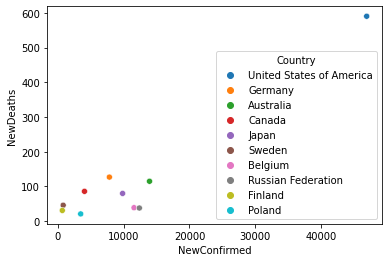

In [202]:
newconfirmed_newdeath = df_clean.groupby(["Country"])["NewConfirmed", "NewDeaths"].sum().reset_index()
newconfirmed_newdeath = newconfirmed_newdeath.sort_values(by='NewDeaths', ascending=False)[:10]


sns.scatterplot(data=newconfirmed_newdeath, x="NewConfirmed", y="NewDeaths",hue="Country")
ax.set_title('Correlación entre casos nuevos confirmados y nuevos fallecimientos')
ax.set_xlabel('Nuevos casos confirmados')
ax.set_ylabel('Nuevos fallecimientos')
ax.legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.2, 1))



Este análisis exploratorio de datos muestra:
i) top 5 paises con casos confirmados totales: Estados Unidos, India, Francia, Alemania, Brasil
ii) top 5 paises con muertes confirmadas: Estados Unidos, Brasil , India, Rusia, Mexico
iii)top 5 paises con nuevos casos de fallecimientos: Estados Unidos, Alemania, Australia, Canada, Japón
iv) top 5 paises con nuevos casos confirmados:Estados Unidos, UK, Australia, Rusia, Belgica

Mientras Estados Unidos esta en el ranking #1 para los 4 índices, se puede notar un incremento de casos en paises antes no mencionados como Australia y Canadá. 

Sin embargo, la tasa de mortalidad (Ratio de mortalidad entre casos de muerte confirmados/casos confirmados totales) muestra que los top 5 son 5 paises no mencionados en los top 5 de # de casos confirmados y # de fallecimientos confirmados: Yemen, Sudan, Siria, Somalia,Peru

Y es el mismo caso para la tasa de mortalidad (Ratio nuevos fallecimientos/nuevos casos):Filipinas, Suecia, Finlandia, Bulgaria, Iran